# Processing Customers


1. For the original problem it can be said that if every customer just pops out of nowhere at the same time, the most fair and efficient way would be “shortest job next” scheduling. This way everybody would have to wait the least time.

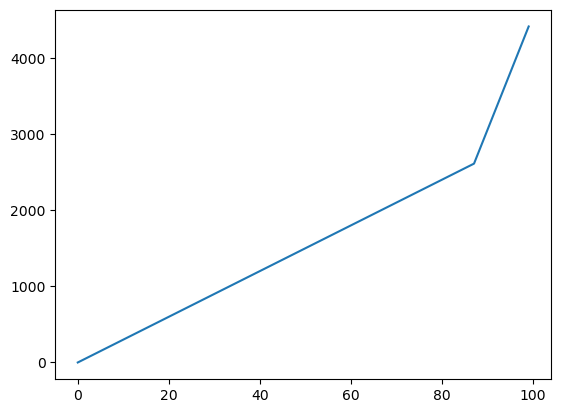

In [33]:
import pandas as pd 
import numpy.random as rnd
import matplotlib.pyplot as plt


#queue generator
# true = quick ; false = slow
line = [rnd.randint(10) for x in range(100)]

line = sorted(line,reverse=True) 

#waittime in secounds
wait=[0]
for x in range(1, len(line)):

    if bool(line[x]) == True:

        wait.append(wait[x - 1] + 30)

    else:

        wait.append(wait[x - 1] + 150)

hold = pd.DataFrame(wait)


plt.plot(hold)

2. Ok So up to this point I was just playing around with Python, but to make the problem more realisitc I have come up with a few variations.


- First, why do all the people arrive at the same time? Irl there should be some delay between them

We can see that in this case, if we continue trying to minimize the total amount of time spent waiting, also red(e.g. people that buy a lot) customers can come first

Although, for this to work our cashier needs to be able to look into the future, because in real life a newly arriving 30 secound customer, could rudley pushaside a 5 minute customer, in order to save time.

<BarContainer object of 40 artists>

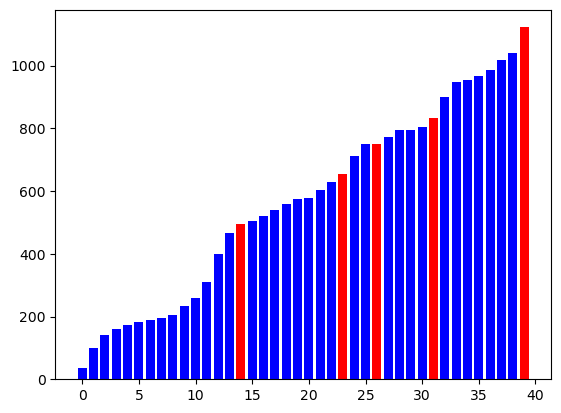

In [80]:
import pandas as pd 
import numpy.random as rnd
import matplotlib.pyplot as plt


#queue generator
# true = quick ; false = slow
line = [rnd.randint(10) for x in range(40)]

line = sorted(line,reverse=True) 

#waittime in secounds
#adding colours to differentiate big and small
#adding random delay in arrivel time
wait=[[rnd.randint(500),"blue"] for x in range(len(line))]


for x in range(1, len(line)):

    if bool(line[x]) == True:

        wait[x] = ([ wait[x][0] + 30 , "blue" ])

    else:

        wait[x] = ([ wait[x][0] + 150 , "red" ])
        

        
#sorting the graph again after the shaking to minimize total waittime
wait = sorted(wait)

wait = [ [ wait[x][0] + wait[x-1][0] , wait[x][1]] if x != 0 else [wait[x][0],wait[x][1]] for x in range(0,len(wait)) ]

    
hold = pd.DataFrame(wait)


plt.bar( x = list(range(len(hold))) , height = hold[0] , color = hold[1])



Now on to some more sensible modifications:


- Second of all in our case as a supermarket our main goal is profit, making customers that buy more wait longer is not good as it encourages buying less




<BarContainer object of 100 artists>

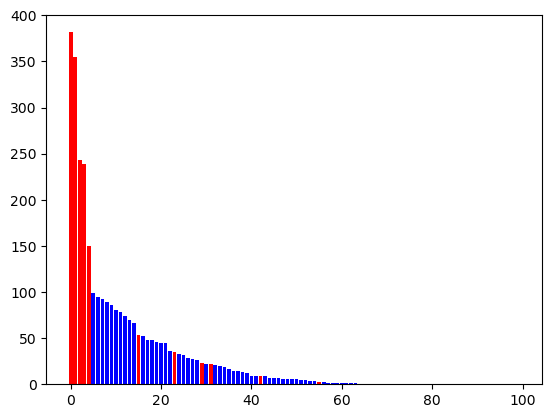

In [11]:
import pandas as pd 
import numpy.random as rnd
import matplotlib.pyplot as plt


#queue generator
# true = quick ; false = slow
line = [rnd.randint(10) for x in range(100)]

#loyalty formula, random number from 0-10 is inserted, outputs number range 0-100
loy = [ ((rnd.random()*10)**6)/(10**4) for x in range (len(line)) ]

    
cash=[]
for x in range(len(line)):

    if bool(line[x]) == True:

        cash.append([ loy[x] , "blue"])

    else:

        cash.append([ loy[x] * 5 , "red"])

cash = sorted(cash,reverse= True)
        
        
hold = pd.DataFrame(cash)

#plot order of customer loyalty (which equals money spent on line skipping)
plt.bar(x = range(100), height = hold[0], color = hold[1],)



#print(sum(loy))
#print(sum(hold[0]))

Now it is time to play some games with this auction system. The big advantage of it is that:
- We earn more cash, because people can pay to skip the line
- Our customers with big purchases can get ahead much quicker, encouraging buying more
- Bad customers that buy little are detered from buying because they would have to wait so long in line, this way encouraging loyal customers to continue buying here

<BarContainer object of 29 artists>

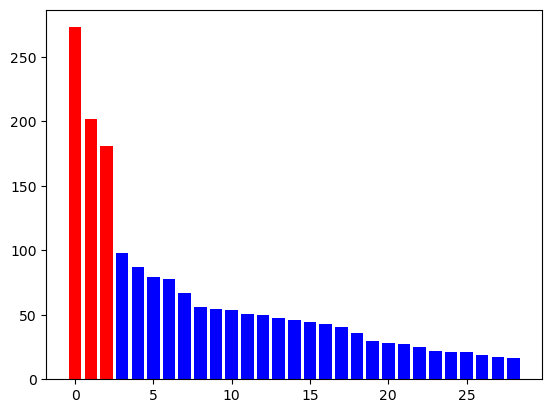

In [62]:
import pandas as pd 
import numpy.random as rnd
import matplotlib.pyplot as plt



#significant variables that can be manipulated
size_line = 100
bonus = 5
big_buyers = 0.1
patience = 1200


#money spent per purchase
big_purchase = 150
small_purchase = 25
#small things take more time for less gains, reason:constant time actions






#queue generator
# smaller than big = big purchase
line = [rnd.random() for x in range(size_line)]

#loyalty formula, random number from 0-10 is inserted, outputs number range 0-100
loy = [ ((rnd.random()*10)**6)/(10**4) for x in range (len(line)) ]



#average loyalty determination
average_loy = sum(loy)/size_line

#adding the auction earnings
cash_earned = sum(loy)





#calculating the points for the auction, big purchasers get a bonus
auction=[]

for x in range( len(line) ):
    
    if line[x] > big_buyers:
        
        auction.append([ loy[x] , "blue"])

        
    else: 
        
        auction.append([ loy[x] * bonus , "red"])

        

#big points first        
auction = sorted(auction,reverse= True)


#calculating waittime
wait=[0]

for x in range(1, len(line) ):
    
    #customers just leave if they dont want to wait
    if wait[x-1] + 30 > patience:
        break
        
    
    
    if auction[x-1][1] == "blue":
        
        wait.append(wait[x-1] + 30)
        
        
        #adding the amount of cash earned per purchase
        cash_earned += small_purchase
        
    else:
    
        wait.append(wait[x-1] + 150)

        cash_earned += big_purchase


        
        

hold = pd.DataFrame(auction)


#a plot as long as wait to show real
plt.bar(x = range(len(wait)), height = hold[0][0:len(wait)], color = hold[1],)



I did not have the time to finish the program, but my intention was to have the loyalty and the customer population be affected by how their last purchase was. 

This way I could create a kind of evolutionary simulation showing after ~1 million runs which variables are the best for maximum profit.


Potential Ideas I did not have the time for: 

- Skipping the person ahead for a dollar(tragedy of the commons esque stuff)

- ultimate fairness, least efficient,  I do everybodies purchase at the same time, everybody has to wait the entire time

- A socialist society: Similar to a house saving contract, people that come first in line are going to have to pay a small premium to come first (less wait time more payment), people that come last receive a small premium (more wait time more premium)